# Introduction to Neural Networks

This tutorial is inspired by an excellent blog post from [Victor Zhou](https://victorzhou.com/blog/intro-to-neural-networks/). We encourage everyone to check out the post and as well Victor's blog for great and easy to understand resources.

**DISCLAIMER**:

>The code below is intended to be educational and straightforward, **not** optimal. Do not use this implementation for projects. A deeper understanding of neural networks is paramount for this course and can best be developed by implementing a neural network and its learning procedure from scratch. We try to leave all unnecessary complexity away, i.e. there is no error handling, output formatting, fancy visualization, etc. Just beautifully minimal code :-)

In [24]:
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# A single Neuron

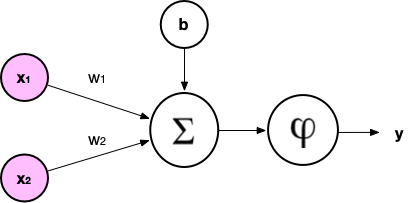

### Activation Function

We take the [sigmoid function](https://en.wikipedia.org/wiki/Sigmoid_function) as activation function $\varphi$ in this tutorial.

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

### Implementation of a single Neuron

In [3]:
class Neuron:
    def __init__(self, weights, bias):
        # weights as vector, bias as number
        # weights and input have same length
        self.weights = weights
        self.bias = bias

    def feedforward(self, inputs):
        # weight inputs, add bias and apply the activation function
        z = self.bias + np.dot(self.weights, inputs)
        return sigmoid(z)

For testing, let us define a two-input neuron with weights $w = [w_1, w_2] = [4,5]$ and bias $b = 2$. We take input $x = [x_1, x_2] = [2,3]$.

In [9]:
# Define the neuron as specified above
bias = 2
weights = np.array([4, 5])
neuron = Neuron(weights, bias)

# Run the feed-forward pass with the given input
x = np.array([2, 3])
output_neuron = neuron.feedforward(x)
print("Result of the feed-forward pass: {:.6f}".format(output_neuron))

Result of the feed-forward pass: 1.000000


# A not so Deep Neural Network

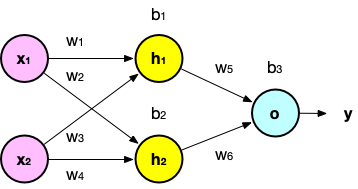

In [10]:
class FirstNeuralNetwork:
    """
    Neural Network consisting of:
    - 2 inputs (x1, x2)
    - 1 hidden layer, with 2 Neurons (h1, h2)
    - 1 output layer, with 1 Neuron (o1)
    
    All three neurons have the same weight and bias for the moment. 
    This is really just for illustration. The more general case with trainable weights follows below. 
    """
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias
        
        # define neurons of the hidden layer
        self.h1 = Neuron(self.weights, self.bias)
        self.h2 = Neuron(self.weights, self.bias)
        
        # define neuron of the output layer
        self.o1 = Neuron(self.weights, self.bias)
    
    def feedforward(self, x):
        # calculate the output of the hidden layer
        out_h1 = self.h1.feedforward(x)
        out_h2 = self.h2.feedforward(x)
        
        # calculate the output of the neural network
        out = self.o1.feedforward(np.asarray([out_h1, out_h2]))
        
        return out

For testing, let us define weights $w = [w_1, w_2] = [0,1]$ and bias $b = 0$. We take input $x = [x_1, x_2] = [2,3]$.

In [12]:
# Define the neural network as specified above
bias = 0
weights = np.array([0, 1])
network = FirstNeuralNetwork(weights, bias)

# Run the feed-forward pass through the network
x = np.array([2, 3])
output_nn = network.feedforward(x)
print("Result of the feed-forward pass: {:.6}".format(output_nn))

Result of the feed-forward pass: 0.721633


# Training a Neural Network

We implement back-propagation to determine weights and bias values that optimize some loss or cost function.

### Mean Squared Erros as Loss Function

In [13]:
def mse_loss(y_true, y_pred):
    assert(len(y_true) == len(y_pred))
    return ((y_true - y_pred) ** 2).mean()

In [14]:
y_true = np.array([1, 0, 0, 1])
y_pred = np.array([0, 0, 1, 0])

print("Calculated loss: {}".format(mse_loss(y_true, y_pred)))

Calculated loss: 0.75


### Derivative of the Activation Function

In [15]:
def deriv_sigmoid(x):
    sigmoid_val = sigmoid(x)
    return sigmoid_val * (1 - sigmoid_val)

### Trainable Neural Network

In [16]:
class FullNeuralNetwork:
    """
    Neural Network consisting of:
    - 2 inputs (x1, x2)
    - 1 hidden layer, with 2 neurons (h1, h2)
    - 1 output layer, with 1 neuron (o1)
    """
    def __init__(self):
        raise NotImplementedError()
    
    def feedforward(self, x):
        raise NotImplementedError()
    
    def train(self, data, labels):
        raise NotImplementedError()

We implement the `__init__()` function by setting all parameters (weights and biases) to random values. 

In [17]:
class FullNeuralNetwork(FullNeuralNetwork):
    def __init__(self):
        # Define the weights in the network
        self.w1 = np.random.normal()
        self.w2 = np.random.normal()
        self.w3 = np.random.normal()
        self.w4 = np.random.normal()
        self.w5 = np.random.normal()
        self.w6 = np.random.normal()
        
        # Define the biases in the network
        self.b1 = np.random.normal()
        self.b2 = np.random.normal()
        self.b3 = np.random.normal()
        
        # Step-size in gradient descent as hyperparameter
        self.learn_rate = 0.1
        
        # Number of loops over the entire dataset as hyperparameter
        self.epochs = 1000 

We implement the `feedforward()` function just like above.

In [18]:
class FullNeuralNetwork(FullNeuralNetwork):
    def feedforward(self, x):
        # Output of the hidden layers (h1, h2)
        out_h1 = sigmoid(self.w1 * x[0] + self.w2 * x[1] + self.b1) # output of h1 neuron in the hidden layer
        out_h2 = sigmoid(self.w3 * x[0] + self.w4 * x[1] + self.b2) # output of h1 neuron in the hidden layer
        
        # Output of the neural network (o1)
        out_o1 = sigmoid(self.w5 * out_h1 + self.w6 * out_h2 + self.b3) # output neuron takes inputs from both hidden neurons
        
        return out_o1

Training with stochastic gradient descent and back-propagation is split into three parts. For each sample in the dataset:
1. Run a forward pass through the network and save the intermediate results
2. Calculate the partial derivates
3. Update the weights and biases

But first, we will look at how we can calculate partial derivates and use them to perform back-propagation.

Imagine we wanted to tweak $w_1$. How would the loss $L$ change if we changed $w_1$? That’s a question the partial derivative $\frac{\partial L}{\partial w_1}$ can answer. So now comes the next question, but how do we calculate it?

To start, let’s rewrite the partial derivative in terms of $\frac{\partial y_{pred}}{\partial w_1}$ instead, using the [Chain Rule](https://en.wikipedia.org/wiki/Chain_rule):
$$\frac{\partial L}{\partial w_1} = \frac{\partial L}{\partial y_{pred}} * \frac{\partial y_{pred}}{\partial w_1}$$

We can calculate $\frac{\partial L}{\partial y_{pred}}$ because our loss function (the mean squared error, MSE) is $L = (1 - y_{pred})^2$:
$$\frac{\partial L}{\partial y_{pred}} = \frac{\partial (1 - y_{pred})^2}{\partial y_{pred}} = -2(1 - y_{pred})$$

Now, let’s figure out what to do with $\frac{\partial y_{pred}}{\partial w_1}$. Let $h_1, h_2, o_1$ be the outputs of the neurons they represent and $f$ is the sigmoid activation function. Then 
$$y_{pred} = o_1 = f(w_5h_1 + w_6h_2 + b_3)$$

And since $w_1$ only affects $h_1$ (not $h_2$), we can write
$$\frac{\partial y_{pred}}{\partial w_1} = \frac{\partial y_{pred}}{\partial h_1} * \frac{\partial h_1}{\partial w_1}$$
$$\frac{\partial y_{pred}}{\partial h_1} = w_5 * f'(w_5h_1 + w_6h_2 + b_3)$$

We do the same thing for $\frac{\partial h_1}{\partial w_1}$:
$$h_1 = f(w_1x_1 + w_3x_2 + b_1)$$
$$\frac{\partial h_1}{\partial w_1} = x_1 * f'(w_1x_1 + w_3x_2 + b_1)$$

This is the second time we’ve seen $f'(x)$ (the derivate of the sigmoid function), let’s derive it:

$$ f(x) = \frac{1}{1 + e^{-x}}$$
$$f'(x) = \frac{e^{-x}}{(1 + e^{-x})^2} = f(x) * (1 - f(x))$$

We’re done! We’ve managed to break down $\frac{\partial L}{\partial w_1}$ into several parts we can calculate:

$$\boxed{\frac{\partial L}{\partial w_1} = \frac{\partial L}{\partial y_{pred}} * \frac{\partial y_{pred}}{\partial h_1} * \frac{\partial h_1}{\partial w_1}}$$

In [27]:
class FullNeuralNetwork(FullNeuralNetwork):
    def train(self, data, labels):
        """
        - data: array of size (n x 2), n = number of samples in the dataset, 2 input features
        - labels: numpy array with n elements, one label per sample
        """
        history_loss = []
        # Perform several loops over the entire training set (epochs)
        for epoch in tqdm(range(self.epochs)):
            
            # Loop over the entire dataset
            for x, y_true in zip(data, labels):
                # 1. Forward pass through the network
                sum_h1 = self.w1 * x[0] + self.w2 * x[1] + self.b1
                out_h1 = sigmoid(sum_h1) # output of h1 neuron in the hidden layer
                
                sum_h2 = self.w3 * x[0] + self.w4 * x[1] + self.b2
                out_h2 = sigmoid(sum_h2) # output of h2 neuron in the hidden layer
                
                sum_o1 = self.w5 * out_h1 + self.w6 * out_h2 + self.b3 # output neuron takes inputs from both hidden neurons
                out_o1 = sigmoid(sum_o1) # output of the neuron (prediction)
                
                # 2. Calculate the partial derivates. 
                # Naming: d_L_d_w1 stands for derivative of L with respect to w1
                
                # Derivative of loss with respect to neuron o1 (output of the network = y_pred)
                d_L_d_o1 = -2 * (y_true - out_o1)
                
                # For neuron o1
                d_o1_d_w5 = out_h1 * deriv_sigmoid(sum_o1) # derivative of y_pred in respect to weight 5
                d_o1_d_w6 = out_h2 * deriv_sigmoid(sum_o1) # derivative of y_pred in respect to weight 6
                d_o1_d_b3 = deriv_sigmoid(sum_o1) # derivative of y_pred in respect to bias 3 (for neuron o1)
                
                d_o1_d_h1 = self.w5 * deriv_sigmoid(sum_o1) # derivative of y_pred in respect to output of neuron h1
                d_o1_d_h2 = self.w6 * deriv_sigmoid(sum_o1) # derivative of y_pred in respect to output of neuron h2

                # For neuron h1
                d_h1_d_w1 = x[0] * deriv_sigmoid(sum_h1) # derivative of output of neuron h1 in respect to weight 1 (= input)
                d_h1_d_w2 = x[1] * deriv_sigmoid(sum_h1) # derivative of output of neuron h1 in respect to weight 2 (= input)
                d_h1_d_b1 = deriv_sigmoid(sum_h1) # derivative of y_pred in respect to bias 1 (for neuron h1)
                
                # For neuron h2
                d_h2_d_w3 = x[0] * deriv_sigmoid(sum_h2) # derivative of output of neuron h2 in respect to weight 3 (= input)
                d_h2_d_w4 = x[1] * deriv_sigmoid(sum_h2) # derivative of output of neuron h2 in respect to weight 4 (= input)
                d_h2_d_b2 = deriv_sigmoid(sum_h2) # derivative of y_pred in respect to bias 2 (for neuron h2)
                
                # 3. Update weights and biases
                # For neuron h1
                self.w1 -= self.learn_rate * d_L_d_o1 * d_o1_d_h1 * d_h1_d_w1 # update weight 1
                self.w2 -= self.learn_rate * d_L_d_o1 * d_o1_d_h1 * d_h1_d_w2 # update weight 2
                self.b1 -= self.learn_rate * d_L_d_o1 * d_o1_d_h1 * d_h1_d_b1 # update bias 1
                
                # For neuron h2
                self.w3 -= self.learn_rate * d_L_d_o1 * d_o1_d_h2 * d_h2_d_w3 # update weight 2
                self.w4 -= self.learn_rate * d_L_d_o1 * d_o1_d_h2 * d_h2_d_w4 # update weight 4
                self.b2 -= self.learn_rate * d_L_d_o1 * d_o1_d_h2 * d_h2_d_b2 # update bias 2
                
                # For neuron o1
                self.w5 -= self.learn_rate * d_L_d_o1 * d_o1_d_w5 # update weight 5
                self.w6 -= self.learn_rate * d_L_d_o1 * d_o1_d_w6 # update weight 6
                self.b3 -= self.learn_rate * d_L_d_o1 * d_o1_d_b3 # update bias 3
            
            # At the end of each tenth epoch, memorize the loss
            if epoch % 10 == 0:
                # Prediction of the network for the dataset
                y_preds = np.apply_along_axis(self.feedforward, axis=1, arr=data)
                loss = mse_loss(y_true=labels, y_pred=y_preds)
                history_loss.append(loss)
                print("Epoch: {}, Loss: {:.6f}".format(epoch, loss))
                
        return history_loss

### Example

Let us apply our neural network to a simple dataset. From weight ($x_1$) and height ($x_2$) of a person we want to predict the gender ($y$). Female is encoded as $1$, male as $0$. The dataset includes 4 people.

In [28]:
data = np.array([
  [60, 165], # Alice
  [72, 182], # Bob
  [68, 177], # Charlie
  [54, 152], # Diana
])

labels = np.array([
  1, # Alice
  0, # Bob
  0, # Charlie
  1, # Diana
])

# Mean of the weight and height
mean_weight = data[:, 0].mean()
mean_height = data[:, 1].mean()

# Apply mean shift to the dataset. 
# Remember, one does not train a machine learning model without normalization.
data[:, 0] = (data[:, 0] - mean_weight).astype(int)
data[:, 1] = (data[:, 1] - mean_height).astype(int)

data

array([[ -3,  -4],
       [  8,  13],
       [  4,   8],
       [ -9, -17]])

We now have all the building blocks and can train the model.

In [29]:
network = FullNeuralNetwork()
history_loss = network.train(data=data, labels=labels)

100%|██████████| 1000/1000 [00:00<00:00, 9091.00it/s]

Epoch: 0, Loss: 0.312295
Epoch: 10, Loss: 0.233938
Epoch: 20, Loss: 0.176697
Epoch: 30, Loss: 0.120515
Epoch: 40, Loss: 0.063611
Epoch: 50, Loss: 0.048072
Epoch: 60, Loss: 0.038493
Epoch: 70, Loss: 0.031899
Epoch: 80, Loss: 0.027101
Epoch: 90, Loss: 0.023472
Epoch: 100, Loss: 0.020642
Epoch: 110, Loss: 0.018383
Epoch: 120, Loss: 0.016542
Epoch: 130, Loss: 0.015016
Epoch: 140, Loss: 0.013733
Epoch: 150, Loss: 0.012641
Epoch: 160, Loss: 0.011702
Epoch: 170, Loss: 0.010885
Epoch: 180, Loss: 0.010170
Epoch: 190, Loss: 0.009539
Epoch: 200, Loss: 0.008978
Epoch: 210, Loss: 0.008477
Epoch: 220, Loss: 0.008026
Epoch: 230, Loss: 0.007619
Epoch: 240, Loss: 0.007249
Epoch: 250, Loss: 0.006913
Epoch: 260, Loss: 0.006604
Epoch: 270, Loss: 0.006322
Epoch: 280, Loss: 0.006061
Epoch: 290, Loss: 0.005820
Epoch: 300, Loss: 0.005597
Epoch: 310, Loss: 0.005390
Epoch: 320, Loss: 0.005197
Epoch: 330, Loss: 0.005017
Epoch: 340, Loss: 0.004849
Epoch: 350, Loss: 0.004691
Epoch: 360, Loss: 0.004543
Epoch: 370, 

### Visualization of Loss during Training

We stored the loss value after 10 epochs in order to visualize its behavior. 

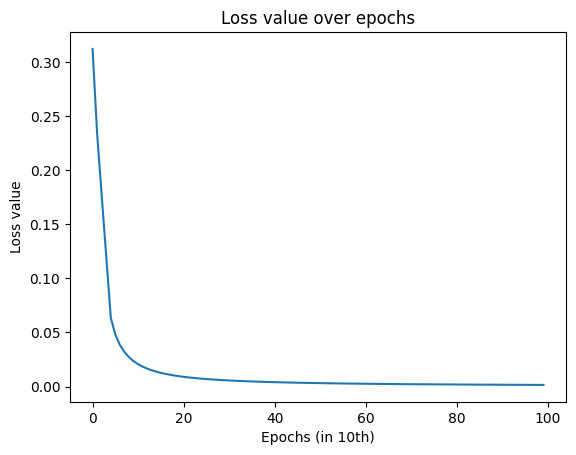

In [30]:
plt.plot(history_loss)
plt.title("Loss value over epochs")
plt.xlabel("Epochs (in 10th)")
plt.ylabel("Loss value")
plt.show()

Finally, can now use our trained neural network for predicting the gender of yet unknown people from their weight and height information.

In [37]:
emily = np.array([58, 160])  # 58 kg, 160 cm
frank = np.array([70, 172])  # 70 kg, 172 cm

emily = (emily - np.array([mean_weight, mean_height])).astype(int)
frank = (frank - np.array([mean_weight, mean_height])).astype(int)

emily_pred = network.feedforward(emily)
frank_pred = network.feedforward(frank)

print(f"Probability of Emily being female: {np.round(emily_pred, 2)}")
print(f"Probability of Frank being female: {np.round(frank_pred, 2)}")

Probability of Emily being female: 0.96
Probability of Frank being female: 0.36


# Assignment

>Now answer the Ilias Quiz 08B Backpropagation - Notebook Verification using this notebook.

In [41]:
peter = np.array([70, 180]) # 70 kg, 180 cm
peter = (peter - np.array([mean_weight, mean_height])).astype(int)

peter_pred = network.feedforward(peter)

print(f"Probability of Peter being male: {1 - np.round(peter_pred, 2)}")

Probability of Peter being male: 0.96
